In [273]:
import pandas as pd
import numpy as np

df = pd.read_excel('dean.xlsx')

df

,Gender,Gender-B,Percent_SSC,Board_SSC,Board_CBSE,Board_ICSE,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,...,Percentile_ET,Percent_MBA,S-TEST*SCORE,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Placement_B,Salary
0,M,0,62.00,Others,0,0,88.00,Others,Commerce,52.00,...,55.00,58.80,55.00,Marketing & HR,50,65,74,Placed,1,270000
1,M,0,76.33,ICSE,0,1,75.33,Others,Science,75.48,...,86.50,66.28,86.50,Marketing & Finance,69,70,75,Placed,1,200000
2,M,0,72.00,Others,0,0,78.00,Others,Commerce,66.63,...,0.00,52.91,0.00,Marketing & Finance,50,61,59,Placed,1,240000
3,M,0,60.00,CBSE,1,0,63.00,CBSE,Arts,58.00,...,75.00,57.80,75.00,Marketing & Finance,54,66,62,Placed,1,250000
4,M,0,61.00,CBSE,1,0,55.00,ISC,Science,54.00,...,66.00,59.43,66.00,Marketing & HR,52,65,67,Placed,1,180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,M,0,62.60,Others,0,0,50.60,Others,Commerce,52.00,...,34.53,58.63,34.53,Marketing & HR,62,57,56,Placed,1,162000
387,M,0,77.00,Others,0,0,49.50,Others,Science,64.00,...,50.53,59.50,50.53,Marketing & Finance,70,59,56,Placed,1,450000
388,M,0,66.40,Others,0,0,72.00,Others,Commerce,57.00,...,60.00,61.63,60.00,Marketing & IB,73,73,54,Placed,1,240000
389,F,1,70.00,ICSE,0,1,77.00,ISC,Commerce,53.00,...,77.00,70.17,77.00,Marketing & Finance,67,77,57,Placed,1,300000


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               391 non-null    object 
 1   Gender-B             391 non-null    int64  
 2   Percent_SSC          391 non-null    float64
 3   Board_SSC            391 non-null    object 
 4   Board_CBSE           391 non-null    int64  
 5   Board_ICSE           391 non-null    int64  
 6   Percent_HSC          391 non-null    float64
 7   Board_HSC            391 non-null    object 
 8   Stream_HSC           391 non-null    object 
 9   Percent_Degree       391 non-null    float64
 10  Course_Degree        391 non-null    object 
 11  Degree_Engg          391 non-null    int64  
 12  Experience_Yrs       391 non-null    int64  
 13  Entrance_Test        324 non-null    object 
 14  S-TEST               391 non-null    int64  
 15  Percentile_ET        391 non-null    flo

array([[<Axes: title={'center': 'Gender-B'}>,
        <Axes: title={'center': 'Percent_SSC'}>,
        <Axes: title={'center': 'Board_CBSE'}>,
        <Axes: title={'center': 'Board_ICSE'}>],
       [<Axes: title={'center': 'Percent_HSC'}>,
        <Axes: title={'center': 'Percent_Degree'}>,
        <Axes: title={'center': 'Degree_Engg'}>,
        <Axes: title={'center': 'Experience_Yrs'}>],
       [<Axes: title={'center': 'S-TEST'}>,
        <Axes: title={'center': 'Percentile_ET'}>,
        <Axes: title={'center': 'Percent_MBA'}>,
        <Axes: title={'center': 'S-TEST*SCORE'}>],
       [<Axes: title={'center': 'Marks_Communication'}>,
        <Axes: title={'center': 'Marks_Projectwork'}>,
        <Axes: title={'center': 'Marks_BOCA'}>,
        <Axes: title={'center': 'Placement_B'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

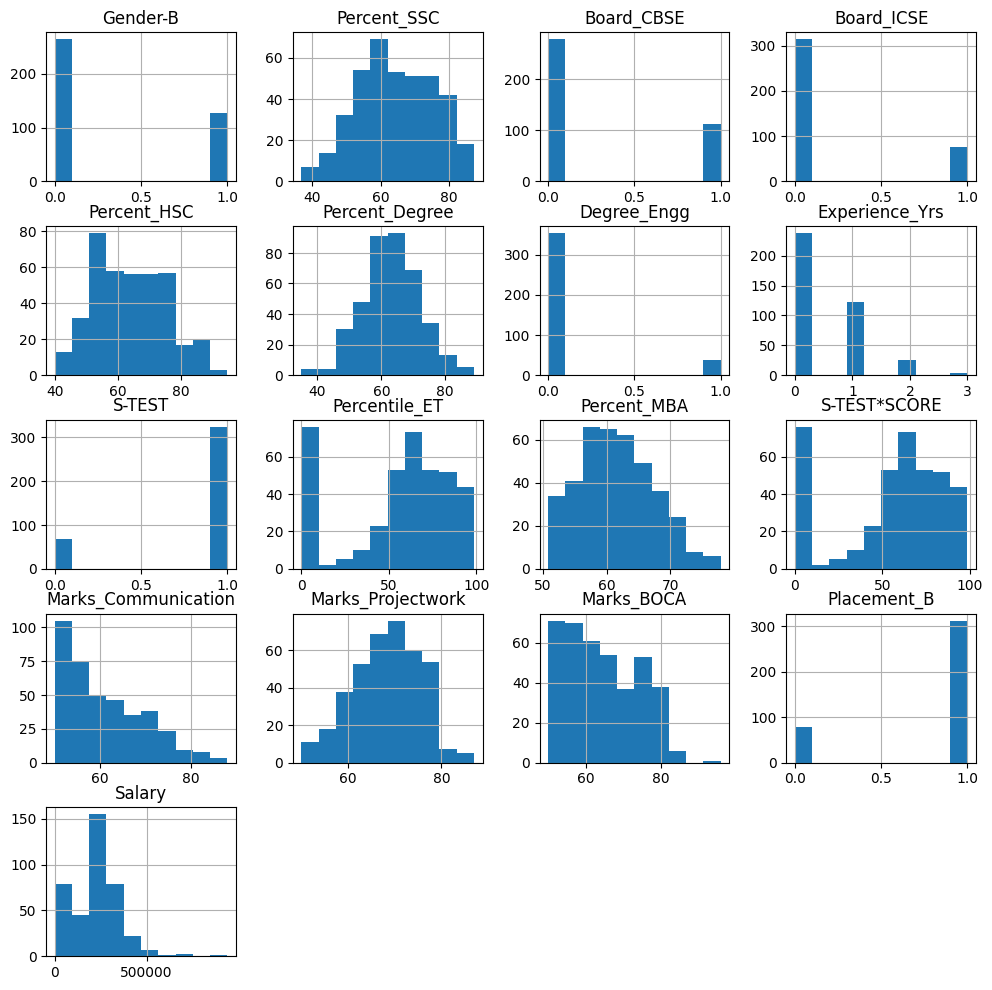

In [275]:
df.hist(figsize=(12,12))

In [276]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# To Split our Data set into training and test data
from sklearn.model_selection import train_test_split

# To calculate accuracy measures and confusion matrix
from sklearn import metrics

In [277]:
df.groupby('Placement_B')['Salary'].mean()

Placement_B
0         0.0
1    274550.0
Name: Salary, dtype: float64

In [278]:
df.groupby('Placement_B')['Salary'].count()

Placement_B
0     79
1    312
Name: Salary, dtype: int64

- 79 not placed vs 312 placed
- among the 312, 274k salary is mean

In [279]:
df_placed = df[df['Placement_B']==1]
df_placed

,Gender,Gender-B,Percent_SSC,Board_SSC,Board_CBSE,Board_ICSE,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,...,Percentile_ET,Percent_MBA,S-TEST*SCORE,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Placement_B,Salary
0,M,0,62.00,Others,0,0,88.00,Others,Commerce,52.00,...,55.00,58.80,55.00,Marketing & HR,50,65,74,Placed,1,270000
1,M,0,76.33,ICSE,0,1,75.33,Others,Science,75.48,...,86.50,66.28,86.50,Marketing & Finance,69,70,75,Placed,1,200000
2,M,0,72.00,Others,0,0,78.00,Others,Commerce,66.63,...,0.00,52.91,0.00,Marketing & Finance,50,61,59,Placed,1,240000
3,M,0,60.00,CBSE,1,0,63.00,CBSE,Arts,58.00,...,75.00,57.80,75.00,Marketing & Finance,54,66,62,Placed,1,250000
4,M,0,61.00,CBSE,1,0,55.00,ISC,Science,54.00,...,66.00,59.43,66.00,Marketing & HR,52,65,67,Placed,1,180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,M,0,67.20,Others,0,0,69.29,Others,Commerce,56.00,...,0.00,61.00,0.00,Marketing & Finance,58,63,67,Placed,1,252000
386,M,0,62.60,Others,0,0,50.60,Others,Commerce,52.00,...,34.53,58.63,34.53,Marketing & HR,62,57,56,Placed,1,162000
387,M,0,77.00,Others,0,0,49.50,Others,Science,64.00,...,50.53,59.50,50.53,Marketing & Finance,70,59,56,Placed,1,450000
388,M,0,66.40,Others,0,0,72.00,Others,Commerce,57.00,...,60.00,61.63,60.00,Marketing & IB,73,73,54,Placed,1,240000


<Axes: >

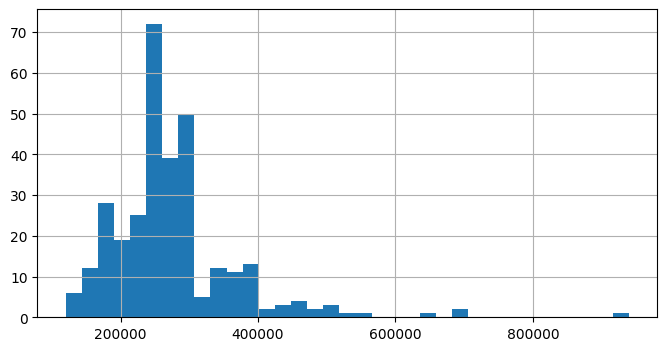

In [280]:
df_placed['Salary'].hist(figsize=(8,4), bins=35)

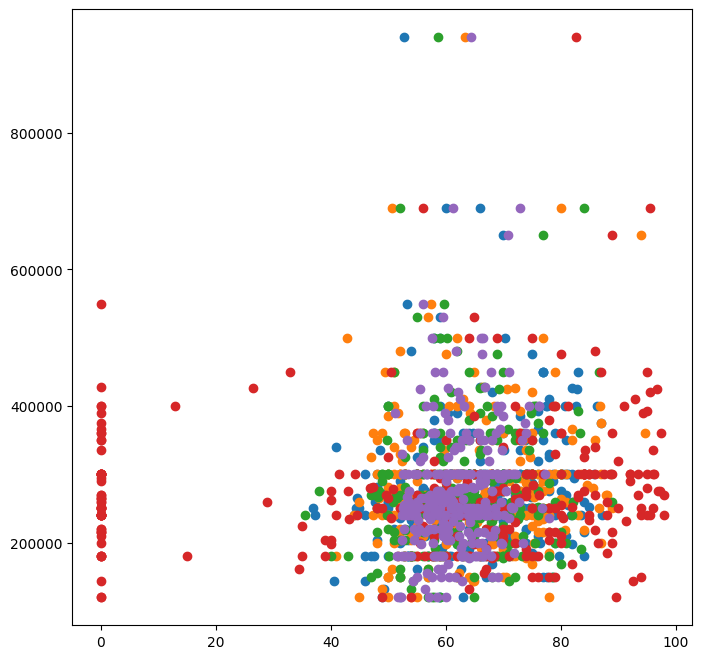

In [281]:
plt.figure(figsize=(8,8))
plt.scatter(df_placed['Percent_SSC'], df_placed['Salary'])
plt.scatter(df_placed['Percent_HSC'], df_placed['Salary'])
plt.scatter(df_placed['Percent_Degree'], df_placed['Salary'])
plt.scatter(df_placed['Percentile_ET'], df_placed['Salary'])
plt.scatter(df_placed['Percent_MBA'], df_placed['Salary'])
# plt.scatter(df_placed['Experience_Yrs'], df_placed['Salary'])


<Axes: >

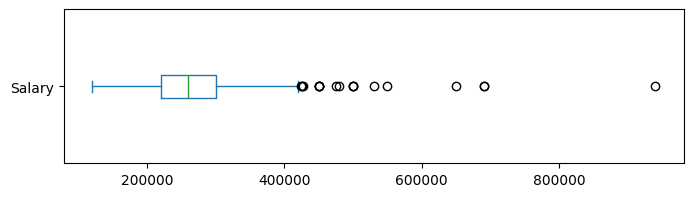

In [282]:
df_placed['Salary'].plot.box(figsize=(8,2), vert=False)

In [283]:
X = df[['Percent_SSC', 'Percent_HSC', 'Percent_Degree', 'Percentile_ET', 'Percent_MBA',
    'Marks_Communication', 'Marks_Projectwork', 'Marks_BOCA']]
X

,Percent_SSC,Percent_HSC,Percent_Degree,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA
0,62.00,88.00,52.00,55.00,58.80,50,65,74
1,76.33,75.33,75.48,86.50,66.28,69,70,75
2,72.00,78.00,66.63,0.00,52.91,50,61,59
3,60.00,63.00,58.00,75.00,57.80,54,66,62
4,61.00,55.00,54.00,66.00,59.43,52,65,67
...,...,...,...,...,...,...,...,...
386,62.60,50.60,52.00,34.53,58.63,62,57,56
387,77.00,49.50,64.00,50.53,59.50,70,59,56
388,66.40,72.00,57.00,60.00,61.63,73,73,54
389,70.00,77.00,53.00,77.00,70.17,67,77,57


array([[<Axes: title={'center': 'Percent_SSC'}>,
        <Axes: title={'center': 'Percent_HSC'}>,
        <Axes: title={'center': 'Percent_Degree'}>],
       [<Axes: title={'center': 'Percentile_ET'}>,
        <Axes: title={'center': 'Percent_MBA'}>,
        <Axes: title={'center': 'Marks_Communication'}>],
       [<Axes: title={'center': 'Marks_Projectwork'}>,
        <Axes: title={'center': 'Marks_BOCA'}>, <Axes: >]], dtype=object)

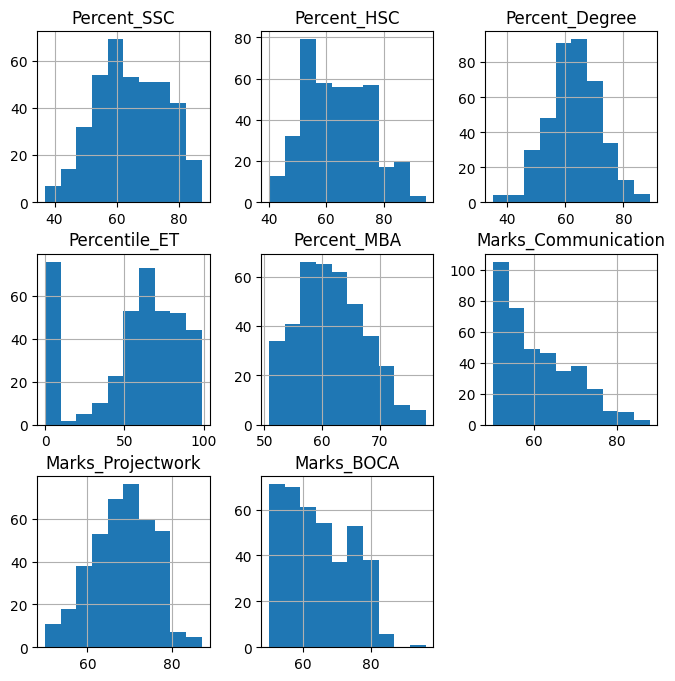

In [284]:
X.hist(figsize=(8,8))

In [285]:
y = df['Placement_B']
y

0      1
1      1
2      1
3      1
4      1
      ..
386    1
387    1
388    1
389    1
390    0
Name: Placement_B, Length: 391, dtype: int64

In [286]:
lr = LogisticRegression()

In [287]:
lr.fit(X, y)

In [288]:
lr.score(X, y)

0.7953964194373402

In [289]:
X.loc[0]

Percent_SSC            62.0
Percent_HSC            88.0
Percent_Degree         52.0
Percentile_ET          55.0
Percent_MBA            58.8
Marks_Communication    50.0
Marks_Projectwork      65.0
Marks_BOCA             74.0
Name: 0, dtype: float64

In [290]:
test = [62, 88, 52, 55, 58.8, 10, 65, 4]
test = np.reshape(test, (1,-1))
test.shape
lr.predict(test)

In [291]:
y.value_counts()

Placement_B
1    312
0     79
Name: count, dtype: int64

In [292]:
predict_test = lr.predict(X)
sr = pd.Series(predict_test)
sr.value_counts()

1    388
0      3
Name: count, dtype: int64

In [293]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y, predict_test),
    index=['actual:no', 'actual:yes'], 
    columns=['pred:no', 'pred:yes']
)
print(cmtx)

            pred:no  pred:yes
actual:no         1        78
actual:yes        2       310
